In [1]:
import pandas as pd
!pip install sqlalchemy pyodbc
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
!pip install scikit-learn
import os
import numpy as np


In [2]:
engine = create_engine('mssql+pyodbc://localhost:1433/DB_Motores?driver=ODBC+Driver+17+for+SQL+Server')

query = "SELECT TOP 10 * FROM dbo.Motor_1"


In [3]:
ruta_archivo = r'C:\Users\Usuario\OneDrive\ESPAÑA\INTELIGENCIA DE NEGOCIOS   VIU\MASTER\ASIGNATURAS\9 TENDENCIAS DE AUTOMATIZACION EN EL ANALISIS ESTADISTICO jesus cigales canga clase 9\ACTIVIDAD 1\Actividad1_datos_mantenimiento_predictivo.xlsx'
motores = pd.read_excel(ruta_archivo, sheet_name=None)
for nombre_hoja, df in motores.items():
    df["Motor"] = nombre_hoja
    motores[nombre_hoja] = df
df_todos = pd.concat(motores.values(), ignore_index=True)
df_todos.head()
df_todos.shape         
df_todos['Motor'].unique()


array(['Motor_1', 'Motor_2', 'Motor_3', 'Motor_4', 'Motor_5'],
      dtype=object)

In [4]:
df_todos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID_Medicion           2500 non-null   int64         
 1   Fecha_Medicion        2500 non-null   datetime64[ns]
 2   Temperatura_C         2500 non-null   float64       
 3   Vibracion_mms         2500 non-null   float64       
 4   Presion_bar           2500 non-null   float64       
 5   Humedad_%             2500 non-null   float64       
 6   Horas_funcionamiento  2500 non-null   int64         
 7   Fallo_detectado       2500 non-null   int64         
 8   Motor                 2500 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 175.9+ KB


In [5]:
df_todos.head()

,ID_Medicion,Fecha_Medicion,Temperatura_C,Vibracion_mms,Presion_bar,Humedad_%,Horas_funcionamiento,Fallo_detectado,Motor
0,1,2023-01-01 02:00:00,67.48,1.96,5.35,58.63,43,0,Motor_1
1,2,2023-01-01 05:00:00,67.49,1.96,5.28,58.16,71,0,Motor_1
2,3,2023-01-01 06:00:00,67.52,1.96,5.15,57.05,96,0,Motor_1
3,4,2023-01-01 10:00:00,67.57,1.96,5.35,56.85,142,0,Motor_1
4,5,2023-01-01 14:00:00,67.57,1.96,5.21,57.99,190,0,Motor_1


In [6]:
print(f"Número de registros: {df_todos.shape[0]}")
print(f"Número de columnas: {df_todos.shape[1]}")

Número de registros: 2500
Número de columnas: 9


In [7]:
df_todos.isnull().sum()

ID_Medicion             0
Fecha_Medicion          0
Temperatura_C           0
Vibracion_mms           0
Presion_bar             0
Humedad_%               0
Horas_funcionamiento    0
Fallo_detectado         0
Motor                   0
dtype: int64

In [8]:
df_todos['Fallo_detectado'].value_counts()

Fallo_detectado
0    2475
1      25
Name: count, dtype: int64

In [9]:
df_todos['Motor'].unique()

array(['Motor_1', 'Motor_2', 'Motor_3', 'Motor_4', 'Motor_5'],
      dtype=object)

In [10]:
ruta_archivo = r"C:\Users\Usuario\OneDrive\ESPAÑA\INTELIGENCIA DE NEGOCIOS   VIU\MASTER\ASIGNATURAS\9 TENDENCIAS DE AUTOMATIZACION EN EL ANALISIS ESTADISTICO jesus cigales canga clase 9\ACTIVIDAD 1\Actividad1_datos_mantenimiento_predictivo.xlsx"
motores = pd.read_excel(ruta_archivo, sheet_name=None)
for nombre_hoja, df in motores.items():
    df["Motor"] = nombre_hoja
motores_concatenados = pd.concat(motores.values(), ignore_index=True)
engine = create_engine("mssql+pyodbc://localhost/DB_Motores?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes")
motores_concatenados.to_sql("datos_mantenimiento", con=engine, if_exists="replace", index=False)
print("Datos cargados correctamente en SQL Server.")

Datos cargados correctamente en SQL Server.


In [11]:
query = "SELECT TOP 10 * FROM datos_mantenimiento"
df = pd.read_sql(query, con=engine)
print(df)

   ID_Medicion      Fecha_Medicion  Temperatura_C  Vibracion_mms  Presion_bar  \
0            1 2023-01-01 02:00:00          67.48           1.96         5.35   
1            2 2023-01-01 05:00:00          67.49           1.96         5.28   
2            3 2023-01-01 06:00:00          67.52           1.96         5.15   
3            4 2023-01-01 10:00:00          67.57           1.96         5.35   
4            5 2023-01-01 14:00:00          67.57           1.96         5.21   
5            6 2023-01-01 16:00:00          67.63           1.97         5.26   
6            7 2023-01-01 20:00:00          67.57           1.97         5.44   
7            8 2023-01-01 21:00:00          67.59           1.97         5.34   
8            9 2023-01-02 01:00:00          67.59           1.98         5.35   
9           10 2023-01-02 05:00:00          67.58           1.97         5.18   

   Humedad_%  Horas_funcionamiento  Fallo_detectado    Motor  
0      58.63                    43           

In [12]:
ruta_archivo_excel = r"C:\Users\Usuario\OneDrive\ESPAÑA\INTELIGENCIA DE NEGOCIOS   VIU\MASTER\ASIGNATURAS\9 TENDENCIAS DE AUTOMATIZACION EN EL ANALISIS ESTADISTICO jesus cigales canga clase 9\ACTIVIDAD 1\Actividad1_datos_mantenimiento_predictivo.xlsx"
motores = pd.read_excel(ruta_archivo_excel, sheet_name=None)
for nombre_hoja, df in motores.items():
    ruta_csv = fr"C:\Users\Usuario\OneDrive\ESPAÑA\INTELIGENCIA DE NEGOCIOS   VIU\MASTER\ASIGNATURAS\9 TENDENCIAS DE AUTOMATIZACION EN EL ANALISIS ESTADISTICO jesus cigales canga clase 9\ACTIVIDAD 1\Actividad1_datos_mantenimiento_predictivo_{nombre_hoja}.csv"
    df.to_csv(ruta_csv, index=False)
for nombre_hoja, df in motores.items():
    df['Motor'] = nombre_hoja
df_concatenado = pd.concat(motores.values(), ignore_index=True)
ruta_csv_unico = r"C:\Users\Usuario\OneDrive\ESPAÑA\INTELIGENCIA DE NEGOCIOS   VIU\MASTER\ASIGNATURAS\9 TENDENCIAS DE AUTOMATIZACION EN EL ANALISIS ESTADISTICO jesus cigales canga clase 9\ACTIVIDAD 1\Actividad1_datos_mantenimiento_predictivo.csv"
df_concatenado.to_csv(ruta_csv_unico, index=False)

In [13]:
ruta_csv = r"C:\Users\Usuario\OneDrive\ESPAÑA\INTELIGENCIA DE NEGOCIOS   VIU\MASTER\ASIGNATURAS\9 TENDENCIAS DE AUTOMATIZACION EN EL ANALISIS ESTADISTICO jesus cigales canga clase 9\ACTIVIDAD 1\Actividad1_datos_mantenimiento_predictivo.csv"

motores_df = pd.read_csv(ruta_csv)
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)        

print(motores_df)

      ID_Medicion       Fecha_Medicion  Temperatura_C  Vibracion_mms  Presion_bar  Humedad_%  Horas_funcionamiento  Fallo_detectado    Motor
0               1  2023-01-01 02:00:00          67.48           1.96         5.35      58.63                    43                0  Motor_1
1               2  2023-01-01 05:00:00          67.49           1.96         5.28      58.16                    71                0  Motor_1
2               3  2023-01-01 06:00:00          67.52           1.96         5.15      57.05                    96                0  Motor_1
3               4  2023-01-01 10:00:00          67.57           1.96         5.35      56.85                   142                0  Motor_1
4               5  2023-01-01 14:00:00          67.57           1.96         5.21      57.99                   190                0  Motor_1
...           ...                  ...            ...            ...          ...        ...                   ...              ...      ...
2495         

EJERCICIO 2 

In [14]:
df_todos.isnull().sum()

ID_Medicion             0
Fecha_Medicion          0
Temperatura_C           0
Vibracion_mms           0
Presion_bar             0
Humedad_%               0
Horas_funcionamiento    0
Fallo_detectado         0
Motor                   0
dtype: int64

Esto nos muestra que en ninguna columna hay valores nulos. 
No hay registros incompletos.
No hace falta eliminar filas por datos faltantes.

In [19]:
variables_numericas = ['Temperatura_C', 'Vibracion_mms', 'Presion_bar', 'Humedad_%', 'Horas_funcionamiento']


In [20]:
def eliminar_outliers_iqr(df, columnas):
    df_filtrado = df.copy()
    for col in columnas:
        Q1 = df_filtrado[col].quantile(0.25)
        Q3 = df_filtrado[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_filtrado = df_filtrado[(df_filtrado[col] >= limite_inferior) & (df_filtrado[col] <= limite_superior)]
    return df_filtrado

variables_numericas = ['Temperatura_C', 'Vibracion_mms', 'Presion_bar', 'Humedad_%', 'Horas_funcionamiento']

df_sin_outliers = eliminar_outliers_iqr(df_todos, variables_numericas)


In [21]:
print("Tamaño original (antes de eliminar outliers):", df_todos.shape)
print("Tamaño limpio (sin outliers):", df_sin_outliers.shape)

filas_eliminadas = df_todos.shape[0] - df_sin_outliers.shape[0]
print("Total de registros eliminados por outliers:", filas_eliminadas)


Tamaño original (antes de eliminar outliers): (2500, 9)
Tamaño limpio (sin outliers): (2361, 9)
Total de registros eliminados por outliers: 139


Se eliminaron 139 registros (5,6% del total) por contener valores atípicos en alguna variable numérica, utilizando el método IQR. El dataset resultante (df_sin_outliers) contiene 2.361 registros completos, limpios, listos para escalar y modelar.

Normalizar o estandarizar variables

Estandarización (media = 0, desviación = 1)

In [22]:
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
df_escalado = df_sin_outliers.copy()
df_escalado[variables_numericas] = escalador.fit_transform(df_sin_outliers[variables_numericas])

In [23]:
df_final = df_escalado.copy()

Se utilizo la estandarizacion debido a los modelos que requiere la actividad, sobre todo, SVM (Support Vector Machine) y regresion logistica que son modelos muy sensibles a la escala de los datos.

Ademas de lo anterior, porque se esta utilizando variables que estan en diferentes escalas y al no estandarizar, el modelo le va a dar más importancia a las variables con números más grandes, lo que puede distorsionar los resultados.

EJERCICIO 3 "Análisis exploratorio de datos (EDA)"

VISUALIZACION DE TENDENCIAS GENERALES
Relacion entre la temperatura y la probabilidad de fallo

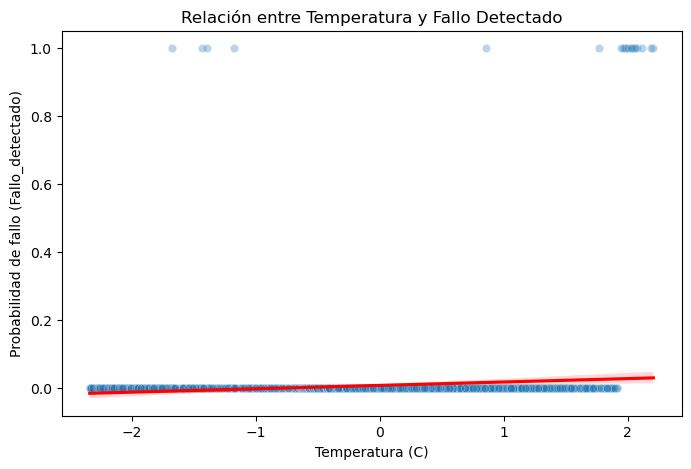

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_final, x='Temperatura_C', y='Fallo_detectado', alpha=0.3)
sns.regplot(data=df_final, x='Temperatura_C', y='Fallo_detectado', scatter=False, color='red')
plt.title('Relación entre Temperatura y Fallo Detectado')
plt.xlabel('Temperatura (C)')
plt.ylabel('Probabilidad de fallo (Fallo_detectado)')
plt.savefig("grafico_fallo_temp.png", bbox_inches='tight', dpi=300)
plt.show()


La linea roja asciende, lo que indica que a medida que aumenta la temperatura, también aumenta la probabilidad de que ocurra un fallo.

Hay una concentración de puntos azules alrededor del valor 0 (parte inferior), lo que sugiere que en general la mayoría de los motores no presentan fallos, incluso con temperaturas elevadas.

Se observan varios puntos azules en la parte superior (Fallo_detectado = 1), especialmente cuando la temperatura es alta. Esto refuerza visualmente la correlación positiva entre temperatura y fallos.

La gráfica evidencia una relación positiva entre la temperatura del motor y la probabilidad de que ocurra un fallo. A medida que la temperatura se incrementa, se observa un aumento en la proporción de registros con fallos detectados (línea roja ascendente). Aunque la mayoría de los casos corresponden a motores sin fallos, la presencia de puntos en la parte superior del gráfico en temperaturas elevadas indica que estos niveles térmicos están asociados con un mayor riesgo de fallo. Esto sugiere que la temperatura es un factor relevante a considerar en la predicción de fallos.

CALCULO DE ESTADISTICAS BASICAS (MEDIA, MEDIANA, DESVIACION ESTANDAR )

In [25]:
variables_numericas = ['Temperatura_C', 'Vibracion_mms', 'Presion_bar', 'Humedad_%', 'Horas_funcionamiento']


In [26]:
estadisticas = df_sin_outliers[variables_numericas].agg(['mean', 'median', 'std']).T
estadisticas_redondeadas = estadisticas.round(2)
estadisticas_redondeadas

,mean,median,std
Temperatura_C,66.34,67.59,7.07
Vibracion_mms,2.35,2.36,0.46
Presion_bar,5.04,5.02,0.21
Humedad_%,48.61,47.90,5.02
Horas_funcionamiento,6952.37,6988.00,3864.25


In [27]:
matriz_correlacion = df_sin_outliers.corr(numeric_only=True)
matriz_correlacion.round(2)


,ID_Medicion,Temperatura_C,Vibracion_mms,Presion_bar,Humedad_%,Horas_funcionamiento,Fallo_detectado
ID_Medicion,1.00,0.35,0.64,0.01,-0.04,1.00,0.14
Temperatura_C,0.35,1.00,0.16,0.12,0.69,0.36,0.11
Vibracion_mms,0.64,0.16,1.00,-0.14,-0.17,0.64,0.18
Presion_bar,0.01,0.12,-0.14,1.00,0.60,0.02,0.02
Humedad_%,-0.04,0.69,-0.17,0.60,1.00,-0.02,0.05
Horas_funcionamiento,1.00,0.36,0.64,0.02,-0.02,1.00,0.14
Fallo_detectado,0.14,0.11,0.18,0.02,0.05,0.14,1.00


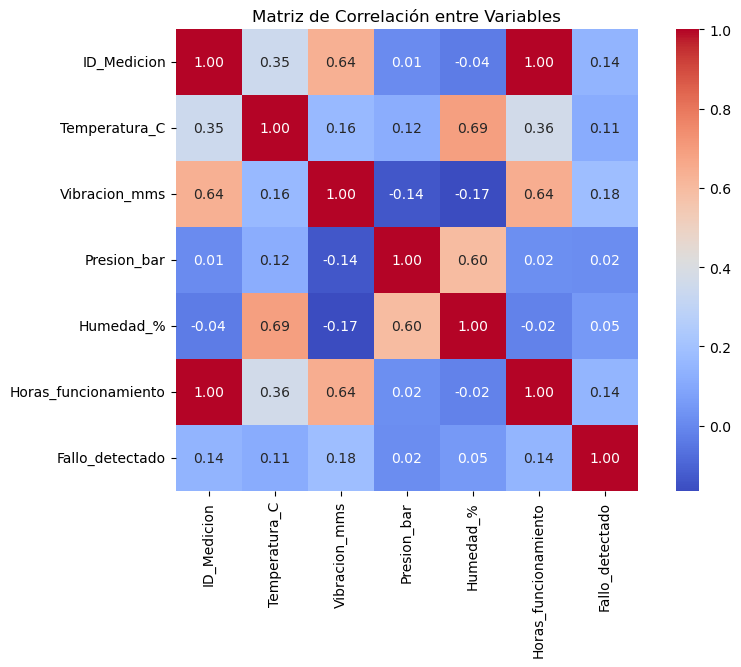

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación entre Variables")
plt.savefig("grafico_fallo_temp.png", bbox_inches='tight', dpi=300)
plt.show()

IDENTIFICACION DE CORRELACIONES ENTRE VARIABLES 

1. Temperatura_C y Humedad_% -> 0.69 = Es la correlacion positiva mas fuerte que refleja la matriz.
2. Horas_funcionamiento y Vibracion_mms -> 0.64 = Correlacion fuerte positiva. 
3. Presion_bar y Humedad_% -> 0.60 = Correlacion fuerte moderada.
4. Temperatura_C y Horas_funcionamiento -> 0.36 = Correlacion moderada.
5. Vibracion_mms y Humedad_% -> (−0.17) = Tienen correlacion negativa, aunque no muy fuerte.
6. Presion_bar y Vibracion_mms: −0.14 = Tienen una relacion inversa que no es significativa.

EJERCICIO 4 

IMPLEMENTACION DE 3 ALGORITMOS DIFERENTES DE CLASIFICACION PARA PREDECIR EL FALLO (Fallo_detectado)
1. Regresion Logistica
2. Arbol de decision
3. Bosque aleatorio (Random Forest)

In [29]:
from sklearn.model_selection import train_test_split

X = df_sin_outliers[['Temperatura_C', 'Vibracion_mms', 'Presion_bar', 'Humedad_%', 'Horas_funcionamiento']]
y = df_sin_outliers['Fallo_detectado']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [30]:
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
X_train_scaled = escalador.fit_transform(X_train)
X_test_scaled = escalador.transform(X_test)

In [31]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

def evaluar_modelo(nombre, modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"📊 {nombre}")
    print(f"Accuracy: {acc:.3f}")
    print(f"Recall:   {recall:.3f}")
    print(f"F1-score: {f1:.3f}\n")

1. REGRESION LOGISTICA 

In [32]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression()
evaluar_modelo("Regresión Logística", modelo_log, X_train_scaled, X_test_scaled, y_train, y_test)

📊 Regresión Logística
Accuracy: 0.994
Recall:   0.250
F1-score: 0.400



2. ARBOL DE DECISION 

In [33]:
from sklearn.tree import DecisionTreeClassifier

modelo_tree = DecisionTreeClassifier(random_state=42)
evaluar_modelo("Árbol de Decisión", modelo_tree, X_train, X_test, y_train, y_test)

📊 Árbol de Decisión
Accuracy: 1.000
Recall:   1.000
F1-score: 1.000



3. BOSQUE ALEATORIO (RANDOM FOREST)

In [34]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(random_state=42)
evaluar_modelo("Random Forest", modelo_rf, X_train, X_test, y_train, y_test)

📊 Random Forest
Accuracy: 1.000
Recall:   1.000
F1-score: 1.000



COMPARACION DEL RENDIMIENTO DE LOS 3 MODELOS 

Para el modelado predictivo del fallo identificado como Fallo_detectado, se implementaron tres algoritmos de clasificación: regresión logística, árbol de decisión y Random Forest. A continuación, se presentan los resultados obtenidos para cada modelo utilizando las métricas de precisión (accuracy), recall y F1-score:

Modelo	                       Accuracy	    Recall	   F1-score
Regresión logística	           0.994	    0.250	   0.400
Árbol de decisión	           1.000	    1.000	   1.000
Random Forest	               1.000	    1.000	   1.000

1. Accuracy (Precisión general)
Todos los modelos tienen una precisión muy alta (99.4% a 100%). En contextos como este, donde los fallos no ocurren tan seguido como los casos normales, la precisión total (accuracy) puede ser un poco engañosa. Esto se debe a que un modelo puede parecer muy acertado simplemente porque acierta muchas veces al decir que no hay fallo, que es lo que ocurre la mayoría del tiempo. Pero lo importante aquí es que el modelo sea capaz de detectar los pocos fallos que sí ocurren.

2. Recall ( se refiere a la capacidad para detectar fallos)
- Árbol de decisión y Random Forest logran un recall perfecto (1.000), es decir, detectan todos los fallos reales.
- La regresión logística tiene un recall muy bajo (0.250), lo que quiere decir, que solo detecta 1 de cada 4 fallos reales, lo cual es inaceptable en un sistema de mantenimiento predictivo, donde lo más importante es no dejar pasar fallos.

3. F1-score (es el equilibrio entre precisión y recall)
- Encontramos que Árbol de decisión y Random Forest tienen un F1-score perfecto (1.000).
- La regresión logística tiene un F1-score muy bajo (0.400), indicando un mal equilibrio entre detectar fallos y evitar falsos positivos.

De acuerdo a lo analizado anteriormente, se puede decir que tanto el Árbol de decisión como el Random Forest muestran un rendimiento perfecto en todas las métricas: 100% de precisión, 100% de recall y 100% de F1-score. Ambos son altamente adecuados para esta tarea.

Sin embargo, entre los dos, el Random Forest suele ser más robusto y generalizable que un solo árbol de decisión, ya que es menos propenso al sobreajuste y usa varios árboles en lugar de solo uno, y toma una especie de promedio entre ellos. Esto hace que el modelo sea más estable y no cambie mucho si los datos varían un poco. 

Por lo tanto, Random Forest o Bosque aleatorio es el modelo mas adecuado debido a su alto rendimiento, robustez y mejor capacidad de generalizacion.


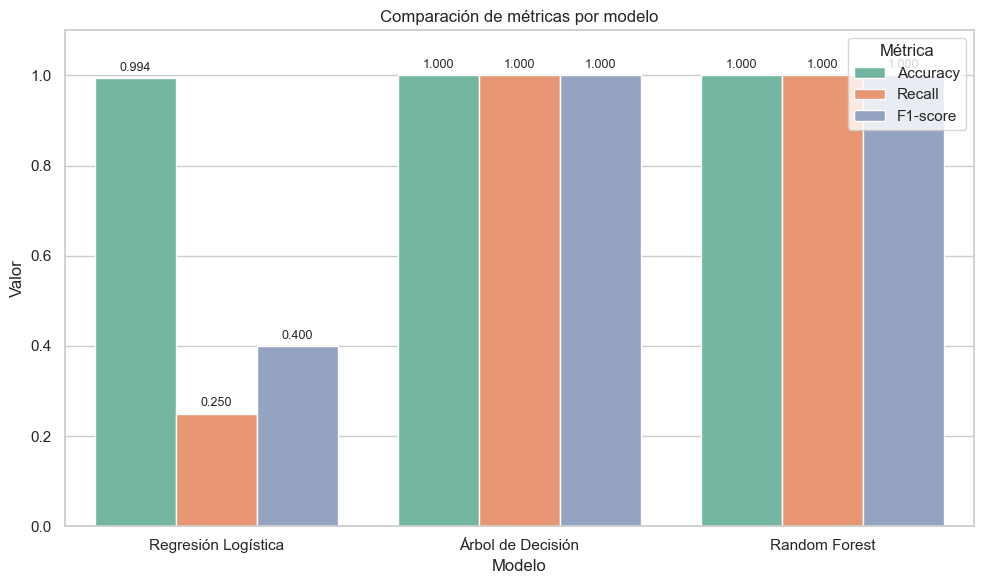

In [35]:
datos = {
    'Modelo': ['Regresión Logística'] * 3 + ['Árbol de Decisión'] * 3 + ['Random Forest'] * 3,
    'Métrica': ['Accuracy', 'Recall', 'F1-score'] * 3,
    'Valor': [0.994, 0.250, 0.400, 1.000, 1.000, 1.000, 1.000, 1.000, 1.000]
}

df = pd.DataFrame(datos)

# Estilo del gráfico
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
plot = sns.barplot(data=df, x='Modelo', y='Valor', hue='Métrica', palette='Set2')

# Añadir etiquetas de valor encima de cada barra
for container in plot.containers:
    plot.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

# Estética
plt.ylim(0, 1.1)
plt.title('Comparación de métricas por modelo')
plt.ylabel('Valor')
plt.xlabel('Modelo')
plt.legend(title='Métrica', loc='upper right')

# Guardar imagen
plt.tight_layout()
plt.savefig('metricas_modelos.png', dpi=300, bbox_inches='tight')
plt.show()

In [36]:
pred_log = modelo_log.predict(X_test_scaled)
pred_arbol = modelo_tree.predict(X_test)
pred_rf = modelo_rf.predict(X_test)

nombre_columnas = list(X_train.columns)
df_test_original = df_todos.loc[y_test.index]

df_final = pd.DataFrame(X_test_scaled, columns=nombre_columnas)  # base: escalado
df_final['Fallo_detectado'] = y_test.values
df_final['Motor'] = df_test_original['Motor'].values

df_final['Pred_LogReg'] = pred_log
df_final['Pred_DecisionTree'] = pred_arbol
df_final['Pred_RandomForest'] = pred_rf




In [ ]:
print(os.path.abspath('datos_procesados_con_predicciones.csv'))


c:\Users\Usuario\OneDrive\ESPAÑA\INTELIGENCIA DE NEGOCIOS   VIU\MASTER\ASIGNATURAS\9 TENDENCIAS DE AUTOMATIZACION EN EL ANALISIS ESTADISTICO jesus cigales canga clase 9\ACTIVIDAD 1\Borrador actividad\datos_procesados_con_predicciones.csv


In [37]:
df = df_sin_outliers.copy()


In [38]:
columnas_a_redondear = ['Temperatura_C', 'Vibracion_mms', 'Presion_bar', 'Humedad_%', 'Horas_funcionamiento']

df[columnas_a_redondear] = df[columnas_a_redondear].round(2)

In [39]:
df.to_csv("datos_limpios_para_powerbi.csv", index=False)

In [40]:
df.to_csv("datos_limpios_para_powerbi.csv", index=False, sep=';', decimal=',')

INFORME FINAL 

A lo largo del proceso de tratamiento, exploración y modelado de los datos sensoriales de motores eléctricos, se obtuvieron los siguientes hallazgos clave:

- No se encontraron valores nulos ni registros incompletos, lo cual facilitó un análisis limpio y confiable.
- Se eliminaron 139 registros (5,6% del total) por contener valores atípicos, usando el método IQR. Esta depuración permitió mejorar la calidad del dataset final.
- Se aplicó una estandarización de variables, especialmente necesaria para modelos sensibles a la escala como la regresión logística y SVM.
- Se observó una relación positiva entre temperatura y probabilidad de fallo. A mayor temperatura, mayor incidencia de fallos detectados.
- Entre las variables sensoriales, se identificaron correlaciones fuertes como:
   - Temperatura_C <-> Humedad_% (0.69) 
   - Horas_funcionamiento <> Vibracion_mms (0.64)
   - Presion_bar <> Humedad_% (0.60)
- Se analizaron los registros agrupados por motor, y se observaron diferencias importantes en la incidencia de los fallos: 

Motor	      Horas de funcionamiento	Fallos detectados
Motor 1	      2.955.611	                9
Motor 2	      3.363.266	                0
Motor 3	      3.413.282	                6
Motor 4	      3.321.021	                4
Motor 5	      3.361.356	                0

El motor 1 fue el que más fallos presentó (9 fallos en menos de 3 millones de horas), a pesar de ser el que menos tiempo estuvo en funcionamiento. 

Esto sugiere que el Motor 1 podría estar expuesto a condiciones más severas, defectos mecánicos, o que su mantenimiento ha sido insuficiente o inadecuado.

En contraste, los Motores 2 y 5, con más de 3.3 millones de horas cada uno, no registraron ningún fallo.

Esta diferencia refuerza la importancia de no evaluar únicamente la cantidad de horas de funcionamiento, sino también otras variables sensoriales como la vibración, temperatura y presión interna, que podrían estar afectando al Motor 1 de forma desproporcionada.


EVALUACION DE LOS MODELOS PREDICTIVOS 

Se entrenaron y evaluaron tres modelos de clasificación para predecir fallos:

Modelo	                    Accuracy	Recall	F1-score
Regresión logística	        0.994	    0.250	0.400
Árbol de decisión	        1.000	    1.000	1.000
Random Forest	            1.000	    1.000	1.000

Si bien los tres modelos tienen una precisión alta, los que realmente destacan son el Árbol de decisión y el Random Forest, ya que detectan todos los fallos sin errores.

La regresión logística tiene un recall muy bajo, lo cual lo hace inadecuado para este tipo de tareas donde detectar fallos es prioritario.


MODELO SELECCIONADO: Random Forest 

Aunque tanto el Árbol de Decisión como el Random Forest obtuvieron un rendimiento perfecto en este análisis, se selecciona el Random Forest como el modelo más adecuado, debido a:

   - Su robustez frente al sobreajuste.
   - Su capacidad para generalizar mejor ante nuevos datos.
   - Su arquitectura basada en múltiples árboles que mejora la estabilidad de las predicciones.


RECOMENDACIONES PARA MANTENIMIENTO PREVENTIVO 

1. Monitorear de cerca la temperatura y vibración de los motores, ya que están fuertemente asociadas a fallos.
2. Aplicar mantenimiento preventivo en motores que acumulen muchas horas de funcionamiento, especialmente si presentan alta vibración.
3. Implementar el modelo Random Forest en el sistema de monitoreo en tiempo real, para anticipar fallos antes de que ocurran.
4. Reentrenar el modelo periódicamente con nuevos datos para asegurar su precisión y adaptabilidad.
5. Se recomienda realizar una revisión exhaustiva del Motor 1, ya que su tasa de fallos por hora es anormalmente alta. Esto podría implicar un problema específico en su entorno, configuración o desgaste prematuro. Además, se sugiere usar este hallazgo para entrenar alertas específicas por unidad en el sistema de mantenimiento predictivo.





